In [1]:
#looking at NFL attendance data from 2015-2019
#all data sourced from pro-football-reference.com

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel("nfl_attendance_data.xlsx")
data.head()

,Week,Year,Home_Team,Away_Team,Neutral_Venue,Capacity,Attendance,percent_filled,home_attendance_avg,game_dif
0,17,2019,Minnesota Vikings,Chicago Bears,NaN,66655,66913,100.387068,100.291426,0.095642
1,17,2019,Denver Broncos,Oakland Raiders,NaN,76125,76334,100.274548,99.753202,0.521346
2,17,2019,Seattle Seahawks,San Francisco 49ers,NaN,69000,69162,100.234783,99.986775,0.248007
3,17,2019,Baltimore Ravens,Pittsburgh Steelers,NaN,71008,70695,99.559205,99.464145,0.095060
4,17,2019,Houston Texans,Tennessee Titans,NaN,72220,71794,99.410136,99.408924,0.001212


In [3]:
#filter out neutral venue games
games = data.loc[data.Neutral_Venue != 'Y']
games.head()

,Week,Year,Home_Team,Away_Team,Neutral_Venue,Capacity,Attendance,percent_filled,home_attendance_avg,game_dif
0,17,2019,Minnesota Vikings,Chicago Bears,NaN,66655,66913,100.387068,100.291426,0.095642
1,17,2019,Denver Broncos,Oakland Raiders,NaN,76125,76334,100.274548,99.753202,0.521346
2,17,2019,Seattle Seahawks,San Francisco 49ers,NaN,69000,69162,100.234783,99.986775,0.248007
3,17,2019,Baltimore Ravens,Pittsburgh Steelers,NaN,71008,70695,99.559205,99.464145,0.095060
4,17,2019,Houston Texans,Tennessee Titans,NaN,72220,71794,99.410136,99.408924,0.001212


In [4]:
#going to create a list of dataframes for each year
#goal is to create multiple graphs simultaneously for each year

#create list of all the different positions
years = list(games.Year.unique())

#create empty dict of all the positions
year_dict = {elem : pd.DataFrame() for elem in years}

for key in year_dict.keys():
    year_dict[key] = games[:][games.Year == key]
    
    #iterate over the list of dataframes
    #first create a list of dfs
    
    df_list = []
    
    for key, value in year_dict.items():
        
        df_list.append(value)

<Figure size 432x288 with 0 Axes>

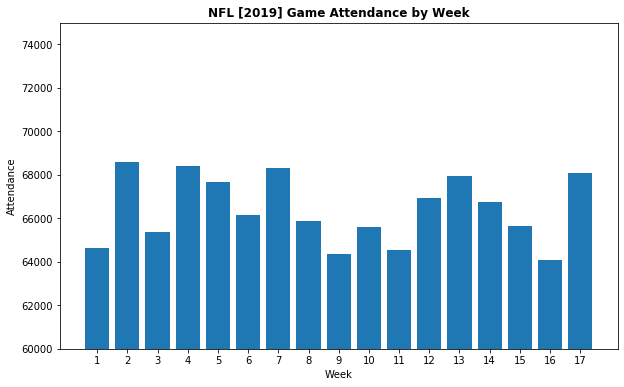

<Figure size 432x288 with 0 Axes>

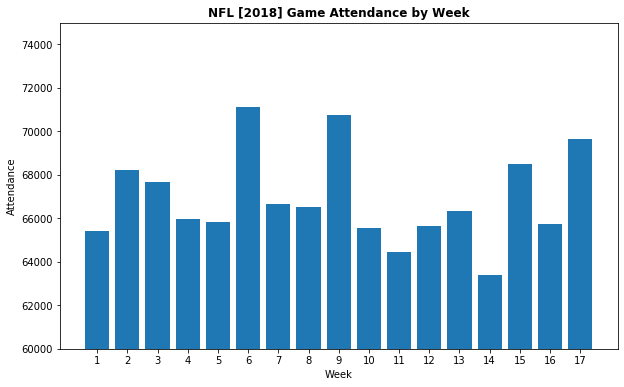

<Figure size 432x288 with 0 Axes>

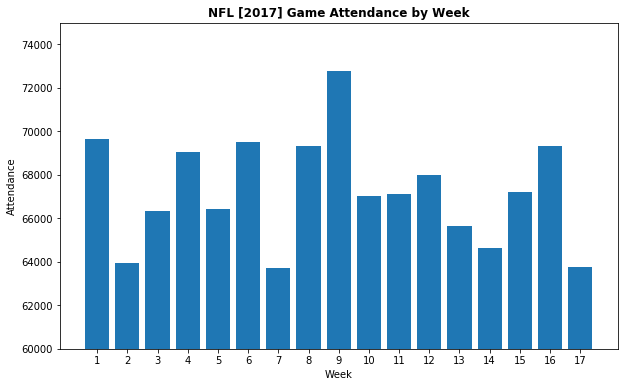

<Figure size 432x288 with 0 Axes>

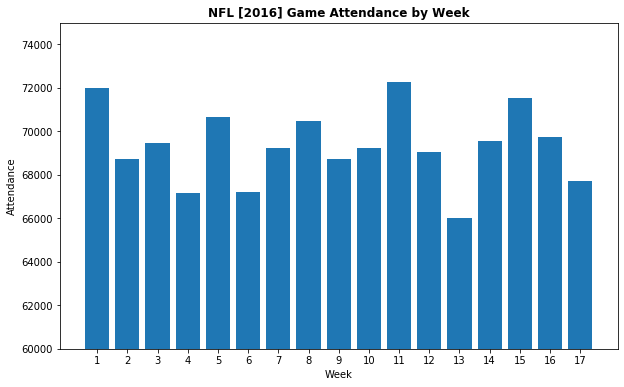

<Figure size 432x288 with 0 Axes>

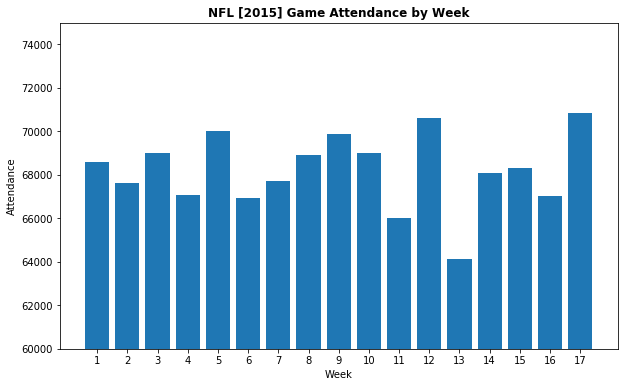

In [5]:
#graphs for attendance by week for each year

for df in df_list:
    df = df.sort_values(by="Week")
    week = df.groupby("Week")['Attendance'].mean()
    
    weeks = range(1,18)
    
    plt.figure()
    
    fig, ax = plt.subplots(figsize = (10,6))
    plt.bar(weeks, week)
    plt.xticks(weeks)
    title = "NFL " + str(df.Year.unique()) + " Game Attendance by Week"
    plt.title(title, fontweight = 'bold')
    plt.xlabel("Week")
    plt.ylabel("Attendance")
    plt.ylim(60000,75000)

In [ ]:
#doesn't seem to be any specific trend based on total attendance number because there is such a difference
#in the capacities of each teams that it varies from week to week

<Figure size 432x288 with 0 Axes>

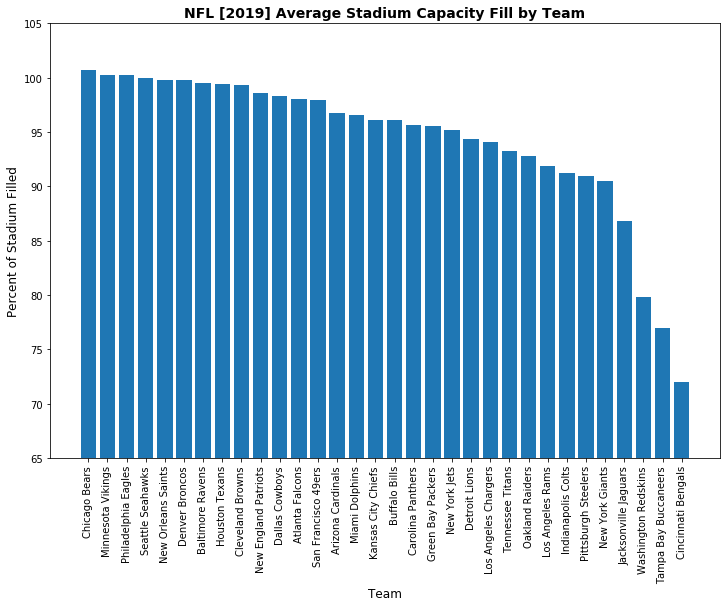

<Figure size 432x288 with 0 Axes>

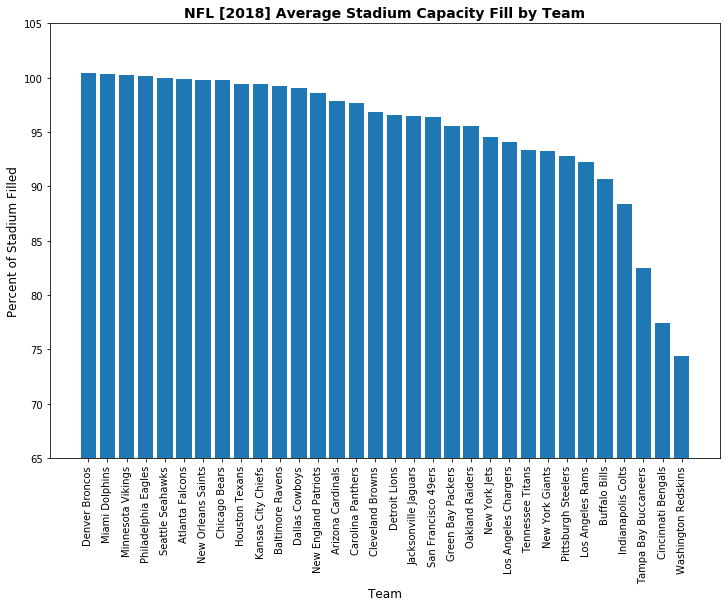

<Figure size 432x288 with 0 Axes>

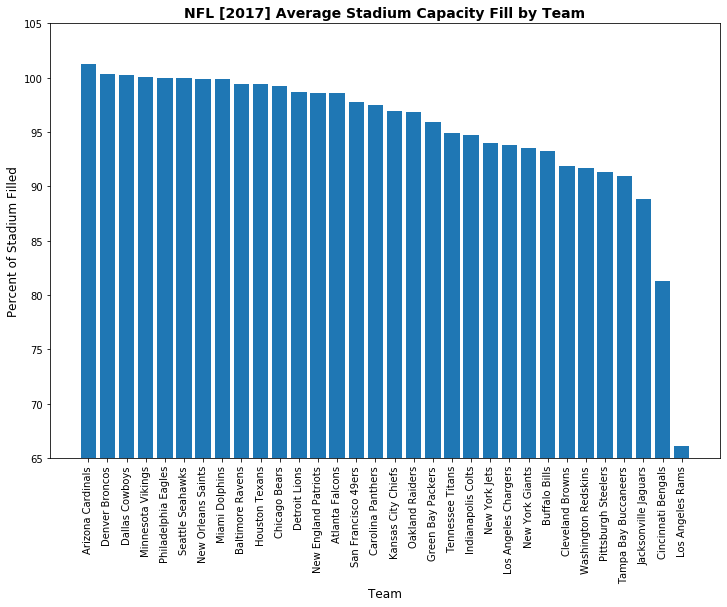

<Figure size 432x288 with 0 Axes>

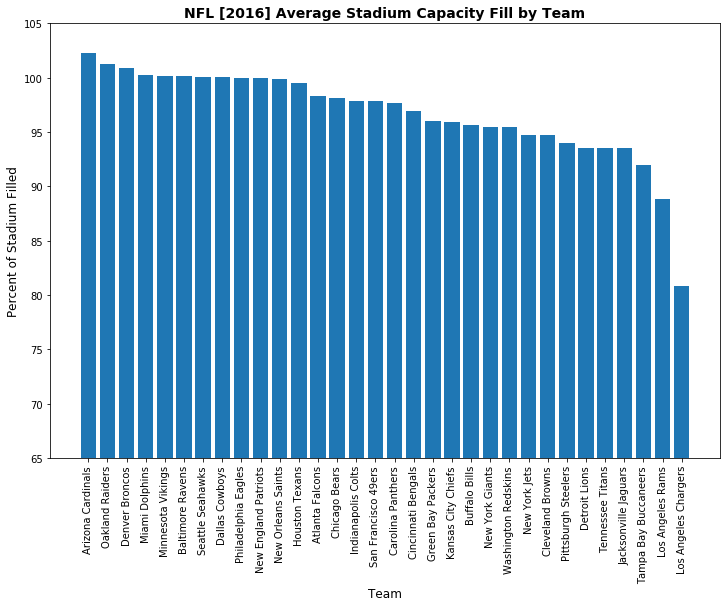

<Figure size 432x288 with 0 Axes>

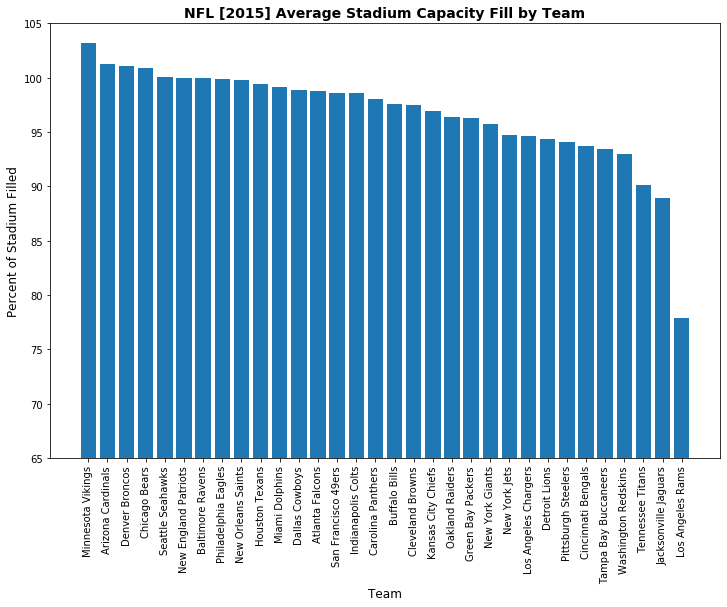

In [6]:
#Percent Stadium filled by Team for last 5 years

for df in df_list:
    
    home_avg = df.groupby('Home_Team')[['Attendance','home_attendance_avg']].mean().sort_values(by = 'Attendance', \
                                                                                               ascending = False)
    
    home_avg = home_avg.sort_values(by = 'home_attendance_avg', ascending = False)

    plt.figure()
    fig, ax = plt.subplots(figsize = (12,8))
    plt.bar(home_avg.index, home_avg.home_attendance_avg)
    title = "NFL " + str(df.Year.unique()) + " Average Stadium Capacity Fill by Team"
    plt.title(title, fontweight = 'bold', size = 14)
    plt.xticks(home_avg.index, rotation = 'vertical', size = 10)
    plt.xlabel("Team", size = 12)
    plt.ylabel("Percent of Stadium Filled", size = 12)
    plt.ylim(65,105)

In [ ]:
#teams that consistently reach or exceed capacity include broncos, cardinals, vikings, eagles, seahawks, ravens, saints, bears
#teams that consistently do poorly here include the LA teams, jags, bucs, bengals, redskins

<Figure size 432x288 with 0 Axes>

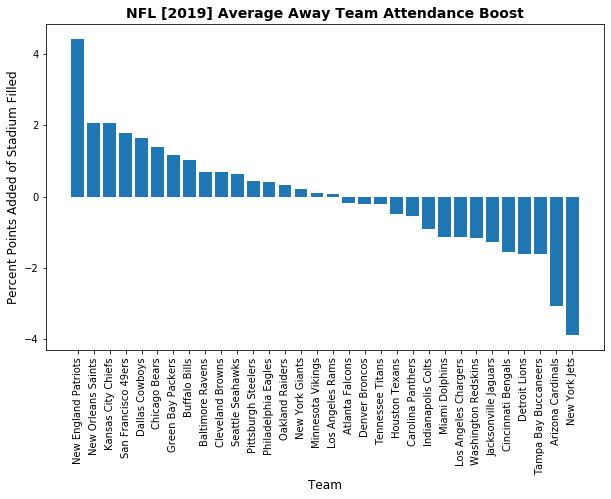

<Figure size 432x288 with 0 Axes>

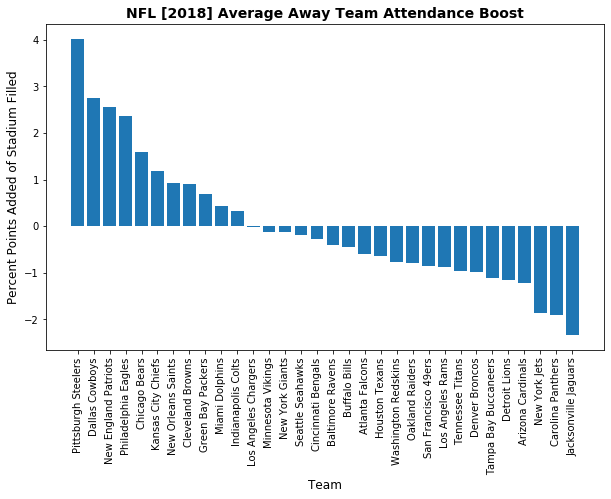

<Figure size 432x288 with 0 Axes>

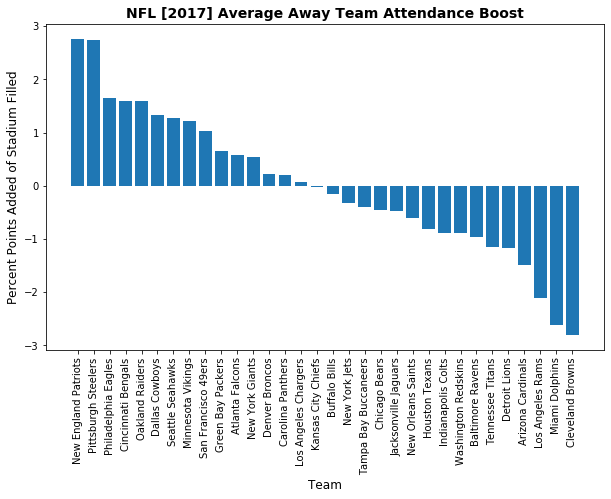

<Figure size 432x288 with 0 Axes>

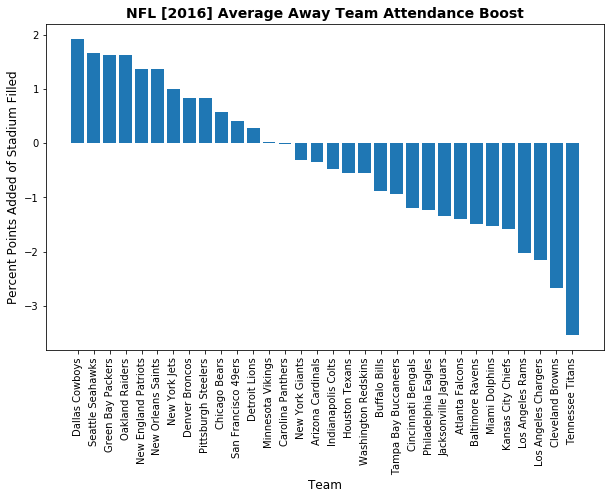

<Figure size 432x288 with 0 Axes>

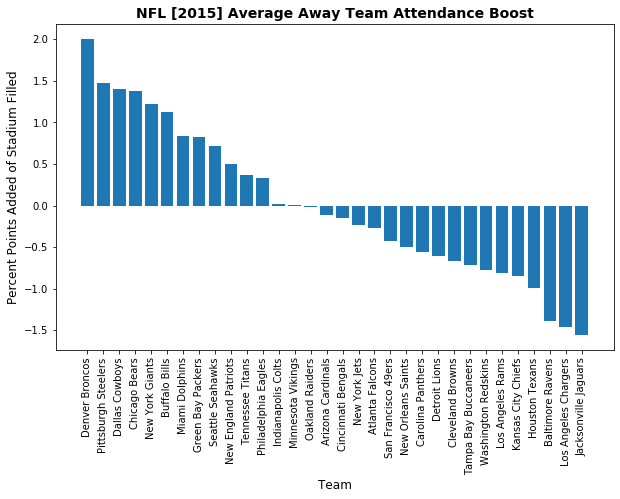

In [7]:
#Look at away team attendance boost for home team for last three years

for df in df_list:
    
    away_dif = df.groupby("Away_Team")["game_dif"].mean().sort_values(ascending = False)

    plt.figure()
    fig, ax = plt.subplots(figsize = (10,6))
    plt.bar(away_dif.index, away_dif)
    title = "NFL " + str(df.Year.unique()) + " Average Away Team Attendance Boost"
    plt.title(title, fontweight = 'bold', size = 14)
    plt.xticks(home_avg.index, rotation = 'vertical', size = 10)
    plt.xlabel("Team", size = 12)
    plt.ylabel("Percent Points Added of Stadium Filled", size = 12)

In [ ]:
# It looks like the teams that are performing well that season are the ones boosting attendance when they're visitors

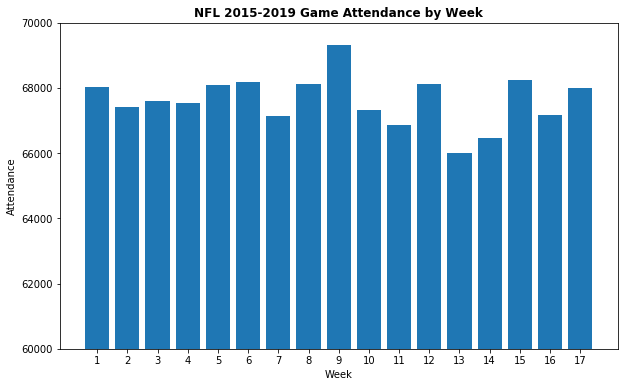

In [8]:
#graph on average attendance over the season by week FOR ALL YEARS
games = games.sort_values(by = "Week")

week = games.groupby('Week')['Attendance'].mean()

weeks = range(1,18)

fig, ax = plt.subplots(figsize = (10,6))
plt.bar(weeks, week)
plt.xticks(weeks)
plt.title("NFL 2015-2019 Game Attendance by Week", fontweight = 'bold')
plt.xlabel("Week")
plt.ylabel("Attendance")
plt.ylim(60000,70000)
plt.show()

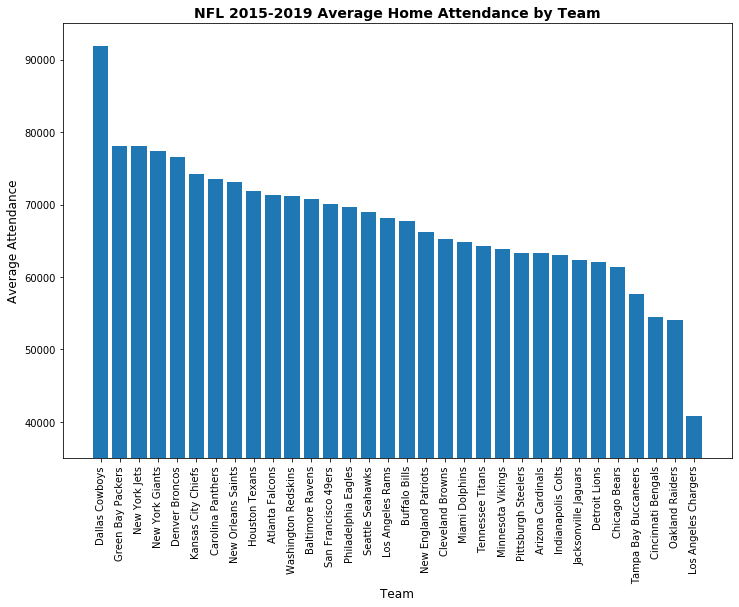

In [9]:
#graph on average home attendance by team FOR ALL YEARS

home_avg = games.groupby('Home_Team')[['Attendance','home_attendance_avg']].mean().sort_values(by = 'Attendance', \
                                                                                               ascending = False)

fig, ax = plt.subplots(figsize = (12,8))
plt.bar(home_avg.index, home_avg.Attendance)
plt.title("NFL 2015-2019 Average Home Attendance by Team", fontweight = 'bold', size = 14)
plt.xticks(home_avg.index, rotation = 'vertical', size = 10)
plt.xlabel("Team", size = 12)
plt.ylabel("Average Attendance", size = 12)
plt.ylim(35000,95000)
plt.show()

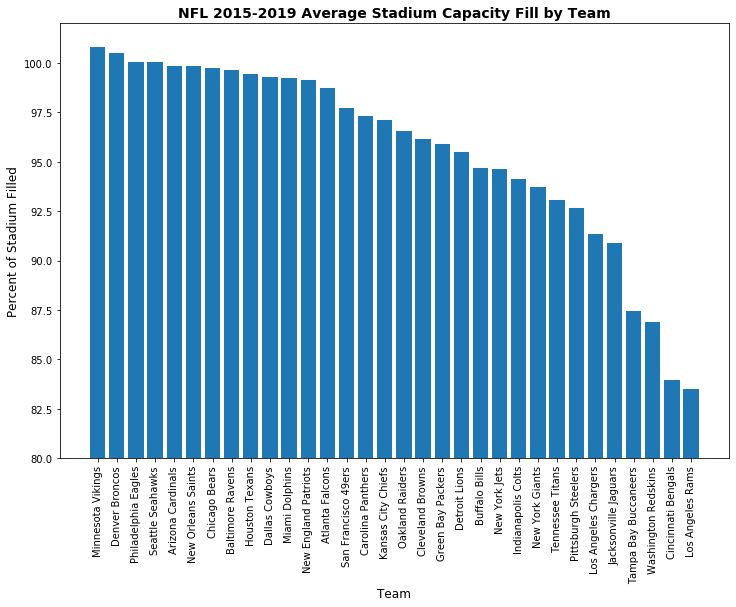

In [74]:
#graph for how filled each team's stadium was for home games FOR ALL YEARS

home_avg = home_avg.sort_values(by = 'home_attendance_avg', ascending = False)

fig, ax = plt.subplots(figsize = (12,8))
plt.bar(home_avg.index, home_avg.home_attendance_avg)
plt.title("NFL 2015-2019 Average Stadium Capacity Fill by Team", fontweight = 'bold', size = 14)
plt.xticks(home_avg.index, rotation = 'vertical', size = 10)
plt.xlabel("Team", size = 12)
plt.ylabel("Percent of Stadium Filled", size = 12)
plt.ylim(80,102)
plt.show()

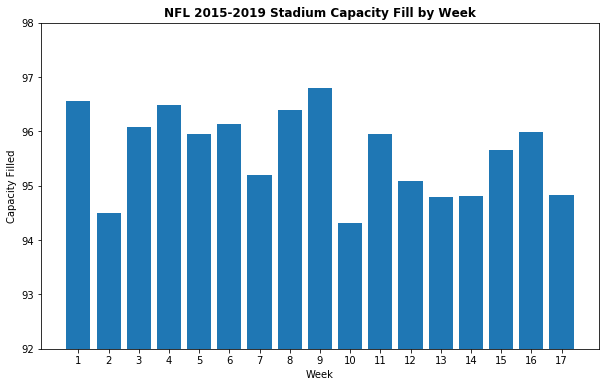

In [10]:
#look at capacity filled by week

week_cap = games.groupby("Week")["percent_filled"].mean()

weeks = range(1,18)

fig, ax = plt.subplots(figsize = (10,6))
plt.bar(weeks, week_cap)
plt.xticks(weeks)
plt.title("NFL 2015-2019 Stadium Capacity Fill by Week", fontweight = 'bold')
plt.xlabel("Week")
plt.ylabel("Capacity Filled")
plt.ylim(92,98)
plt.show()

In [ ]:
#interesting that there is such a drastic increase from week 1 to 2 and week 9 to 10
#latter half of the season definitely has lower attendance than first half probably because of weather and other sports starting

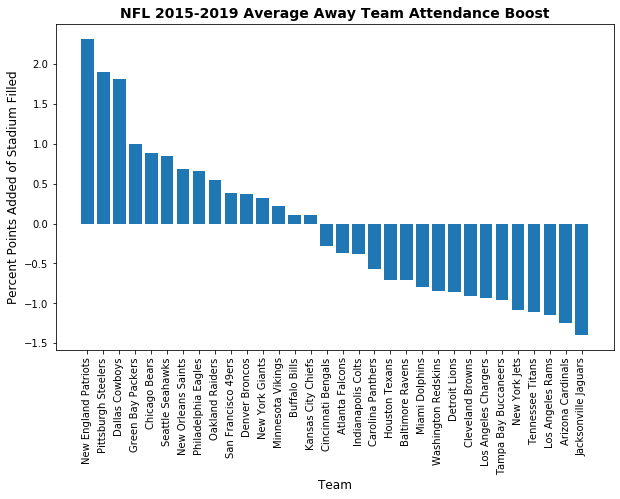

In [11]:
#FOR ALL YEARS
#graph on which team had the highest away game differential 
#which away team generated the largest boost in attendance for that home team's typical attendance

away_dif = games.groupby("Away_Team")["game_dif"].mean().sort_values(ascending = False)


fig, ax = plt.subplots(figsize = (10,6))
plt.bar(away_dif.index, away_dif)
plt.title("NFL 2015-2019 Average Away Team Attendance Boost", fontweight = 'bold', size = 14)
plt.xticks(away_dif.index, rotation = 'vertical', size = 10)
plt.xlabel("Team", size = 12)
plt.ylabel("Percent Points Added of Stadium Filled", size = 12)
plt.show()

In [ ]:
#better teams with storied franchises sell better- Pats/Steelers/Cowboys/Packers/Bears
#worse teams with smaller markets sell worse- jags/cardinals/rams/titans

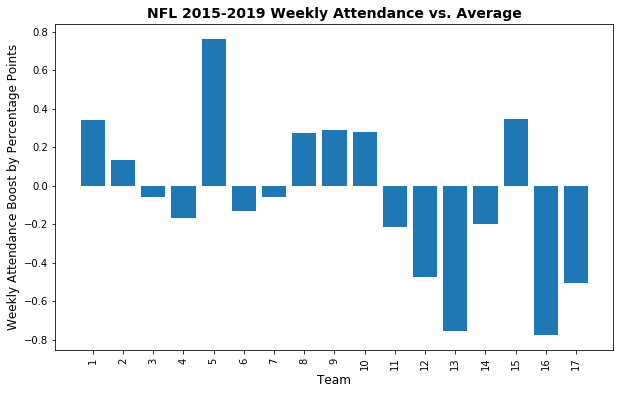

In [12]:
#how does that weeks attendance compare to the average?

games_week = games.groupby("Week")["game_dif"].mean()

fig, ax = plt.subplots(figsize = (10,6))
plt.bar(games_week.index, games_week)
plt.title("NFL 2015-2019 Weekly Attendance vs. Average", fontweight = 'bold', size = 14)
plt.xticks(games_week.index, rotation = 'vertical', size = 10)
plt.xlabel("Team", size = 12)
plt.ylabel("Weekly Attendance Boost by Percentage Points", size = 12)
plt.show()

In [ ]:
#attendance definitely goes down in the colder months, which also includes when hockey and basketball starts